# Data Preparation

In [1]:
suppressMessages(library(CausalImpact))
suppressMessages(library(dplyr))

In [2]:
df <- read.csv("dataset//20180916-bukalapak-campaign.csv")

In [3]:
head(df)

Month,Tokopedia,observed,residual,flag
2011-01-01,1,4,NA,BEFORE_CAMPAIGN
2011-02-01,2,4,NA,BEFORE_CAMPAIGN
2011-03-01,2,4,NA,BEFORE_CAMPAIGN
2011-04-01,2,5,NA,BEFORE_CAMPAIGN
2011-05-01,2,4,NA,BEFORE_CAMPAIGN
2011-06-01,2,4,NA,BEFORE_CAMPAIGN


In [4]:
# df[df$flag == 'AFTER_FIRST_CAMPAIGN', ] 

# Analysis

## Causal Impact

We'll use Tokopedia search query data as reference point; considering that it is highly correlated to Bukalapak's.

### First campaign

In [61]:
pre.period <- as.Date(c('2015-01-01','2016-12-01'))
post.period <- as.Date(c('2017-01-01','2018-09-01'))

In [62]:
time.points <- as.Date(df$Month)
data <- zoo(cbind(df$observed, df$Tokopedia), time.points)
# data <- zoo(cbind(df$observed), time.points)

In [63]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting post.period[2] to end of data: 2018-08-31”

Warning message:
“Removed 93 rows containing missing values (geom_path).”Warning message:
“Removed 49 rows containing missing values (geom_path).”Warning message:
“Removed 186 rows containing missing values (geom_path).”

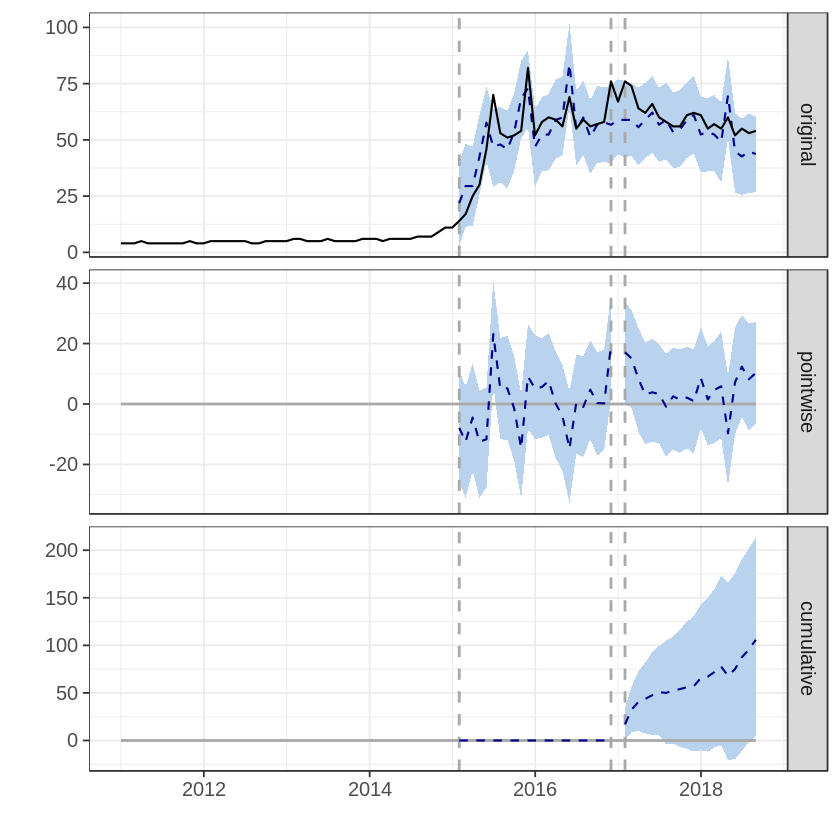

In [64]:
plot(ci)

In [65]:
summary(ci)

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   60             1197        
Prediction (s.d.)        55 (2,7)       1091 (53,9) 
95% CI                   [49, 60]       [984, 1192] 
                                                    
Absolute effect (s.d.)   5,3 (2,7)      105,9 (53,9)
95% CI                   [0,26, 11]     [5,17, 213] 
                                                    
Relative effect (s.d.)   9,7% (4,9%)    9,7% (4,9%) 
95% CI                   [0,47%, 20%]   [0,47%, 20%]

Posterior tail-area probability p:   0,02378
Posterior prob. of a causal effect:  97,622%

For more details, type: summary(impact, "report")



In [66]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 59,85. By contrast, in the absence of an intervention, we would have expected an average response of 54,55. The 95% interval of this counterfactual prediction is [49,18, 59,59]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 5,30 with a 95% interval of [0,26, 10,67]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 1,20K. By contrast, had the intervention not taken place, we would have expected a sum of 1,09K. The 95% interval of this prediction is [0,98K, 1,19K].

The above results are given in terms of absolute numbers. In relative terms, the response variable showe

### Second campaign

In [67]:
pre.period <- as.Date(c('2015-01-01','2017-06-01'))
post.period <- as.Date(c('2017-07-01','2018-09-01'))

In [68]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting post.period[2] to end of data: 2018-08-31”

Warning message:
“Removed 93 rows containing missing values (geom_path).”Warning message:
“Removed 49 rows containing missing values (geom_path).”Warning message:
“Removed 186 rows containing missing values (geom_path).”

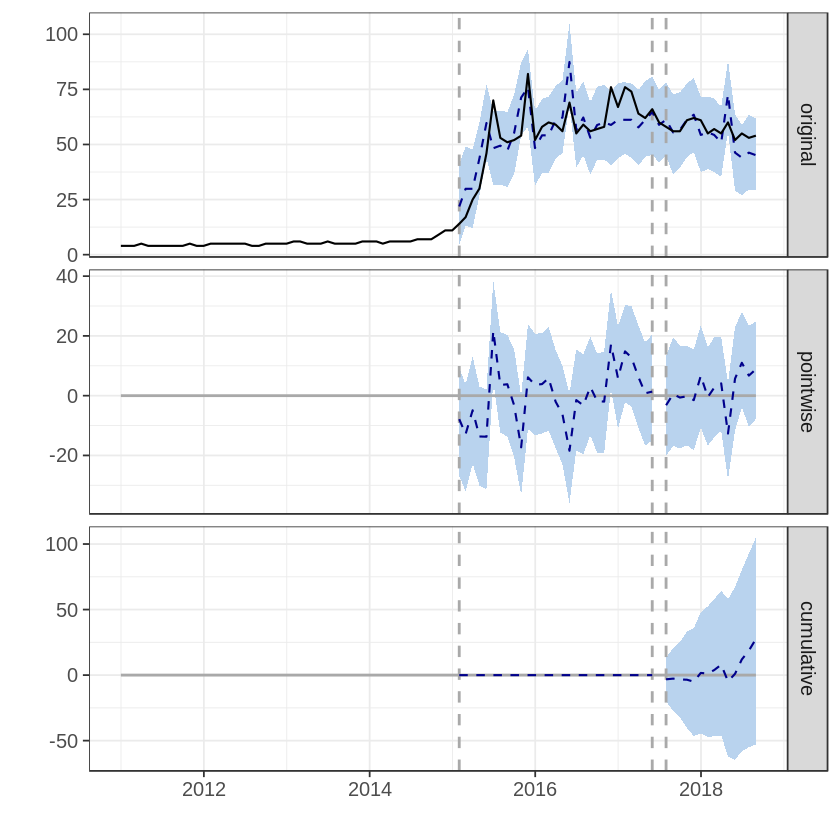

In [69]:
plot(ci)

In [70]:
summary(ci)

Posterior inference {CausalImpact}

                         Average        Cumulative    
Actual                   57             795           
Prediction (s.d.)        55 (2,8)       767 (39,0)    
95% CI                   [49, 61]       [690, 848]    
                                                      
Absolute effect (s.d.)   2 (2,8)        28 (39,0)     
95% CI                   [-3,8, 7,5]    [-52,8, 105,0]
                                                      
Relative effect (s.d.)   3,6% (5,1%)    3,6% (5,1%)   
95% CI                   [-6,9%, 14%]   [-6,9%, 14%]  

Posterior tail-area probability p:   0,23436
Posterior prob. of a causal effect:  77%

For more details, type: summary(impact, "report")



In [71]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 56,79. In the absence of an intervention, we would have expected an average response of 54,82. The 95% interval of this counterfactual prediction is [49,29, 60,56]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 1,97 with a 95% interval of [-3,77, 7,50]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 795,00. Had the intervention not taken place, we would have expected a sum of 767,45. The 95% interval of this prediction is [690,01, 847,83].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of +4%. 

## Bayesian Changepoint

Using this approach, we'll try to detect on which point the pattern changes. We only use Bukalapak observed search count from January 2016 onwards, since its search query is still low on the previous period.

In [53]:
df$Month <- as.POSIXct(df$Month, format='%Y-%m-%d')

In [73]:
# library("bcp")

# bcp <- bcp(y=subset(df, Month >= '2016-01-01')$observed)

# plot(bcp, xlab="Index")

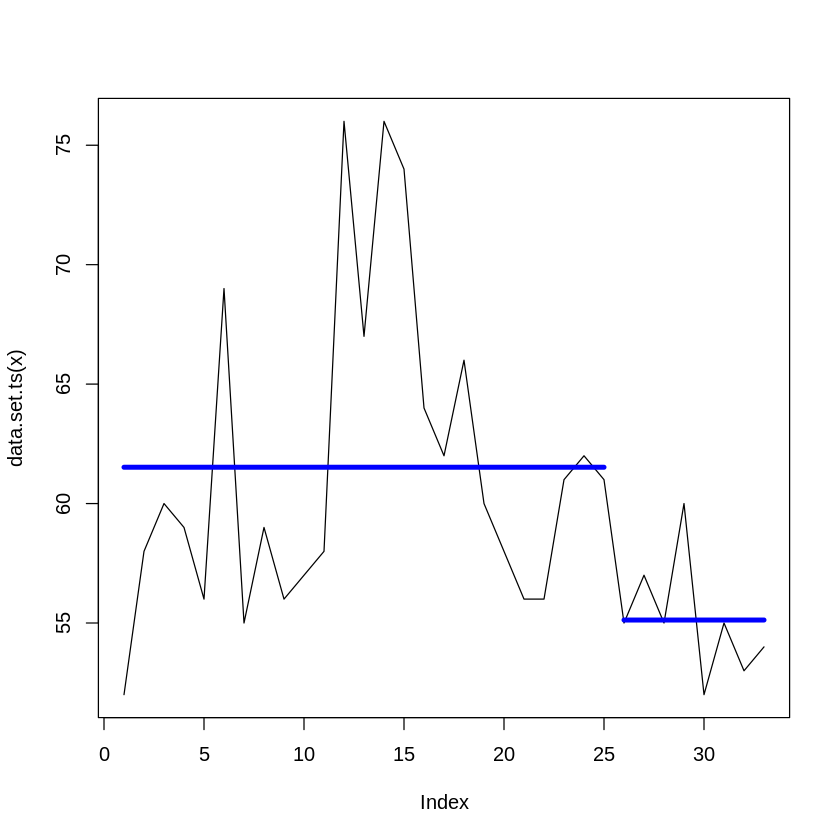

In [60]:
library("changepoint")

results <- cpt.mean(subset(df, Month >= '2016-01-01')$observed)
plot(results,cpt.col="blue",xlab="Index",cpt.width=4)

The changepoint occurs on January 2018.